<a href="https://colab.research.google.com/github/ArshiaSali/Frequent-Pattern-Mining/blob/main/Frequent_Pattern_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Frequent Pattern Mining**

It is an analytical process that finds frequent patterns, associations, or causal structures from data sets found in various kinds of databases such as relational databases, transactional databases, and other data repositories. Given a set of transactions, this process aims to find the rules that enable us to predict the occurrence of a specific item based on the occurrence of other items in the transaction.

## **Dataset Used**

Dataset is taken from Kaggle - <a href="https://www.kaggle.com/hemanthkumar05/market-basket-optimization"> Click here for Dataset </a>

## **Objective Function**

**Market Basket**

The market basket is a list of some fixed items that are used to track the inflation and overall price movements of a specific market in an economy. In other words, it is a basket that contains a set of standard goods or services that people commonly buys.


## **Few Use Cases**


This helps in giving suggestions to customers and also to keep these items together in a shop.

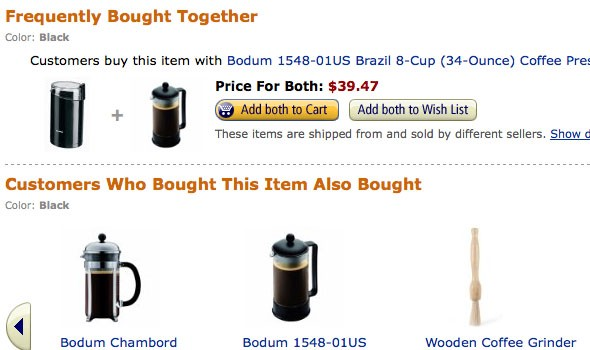

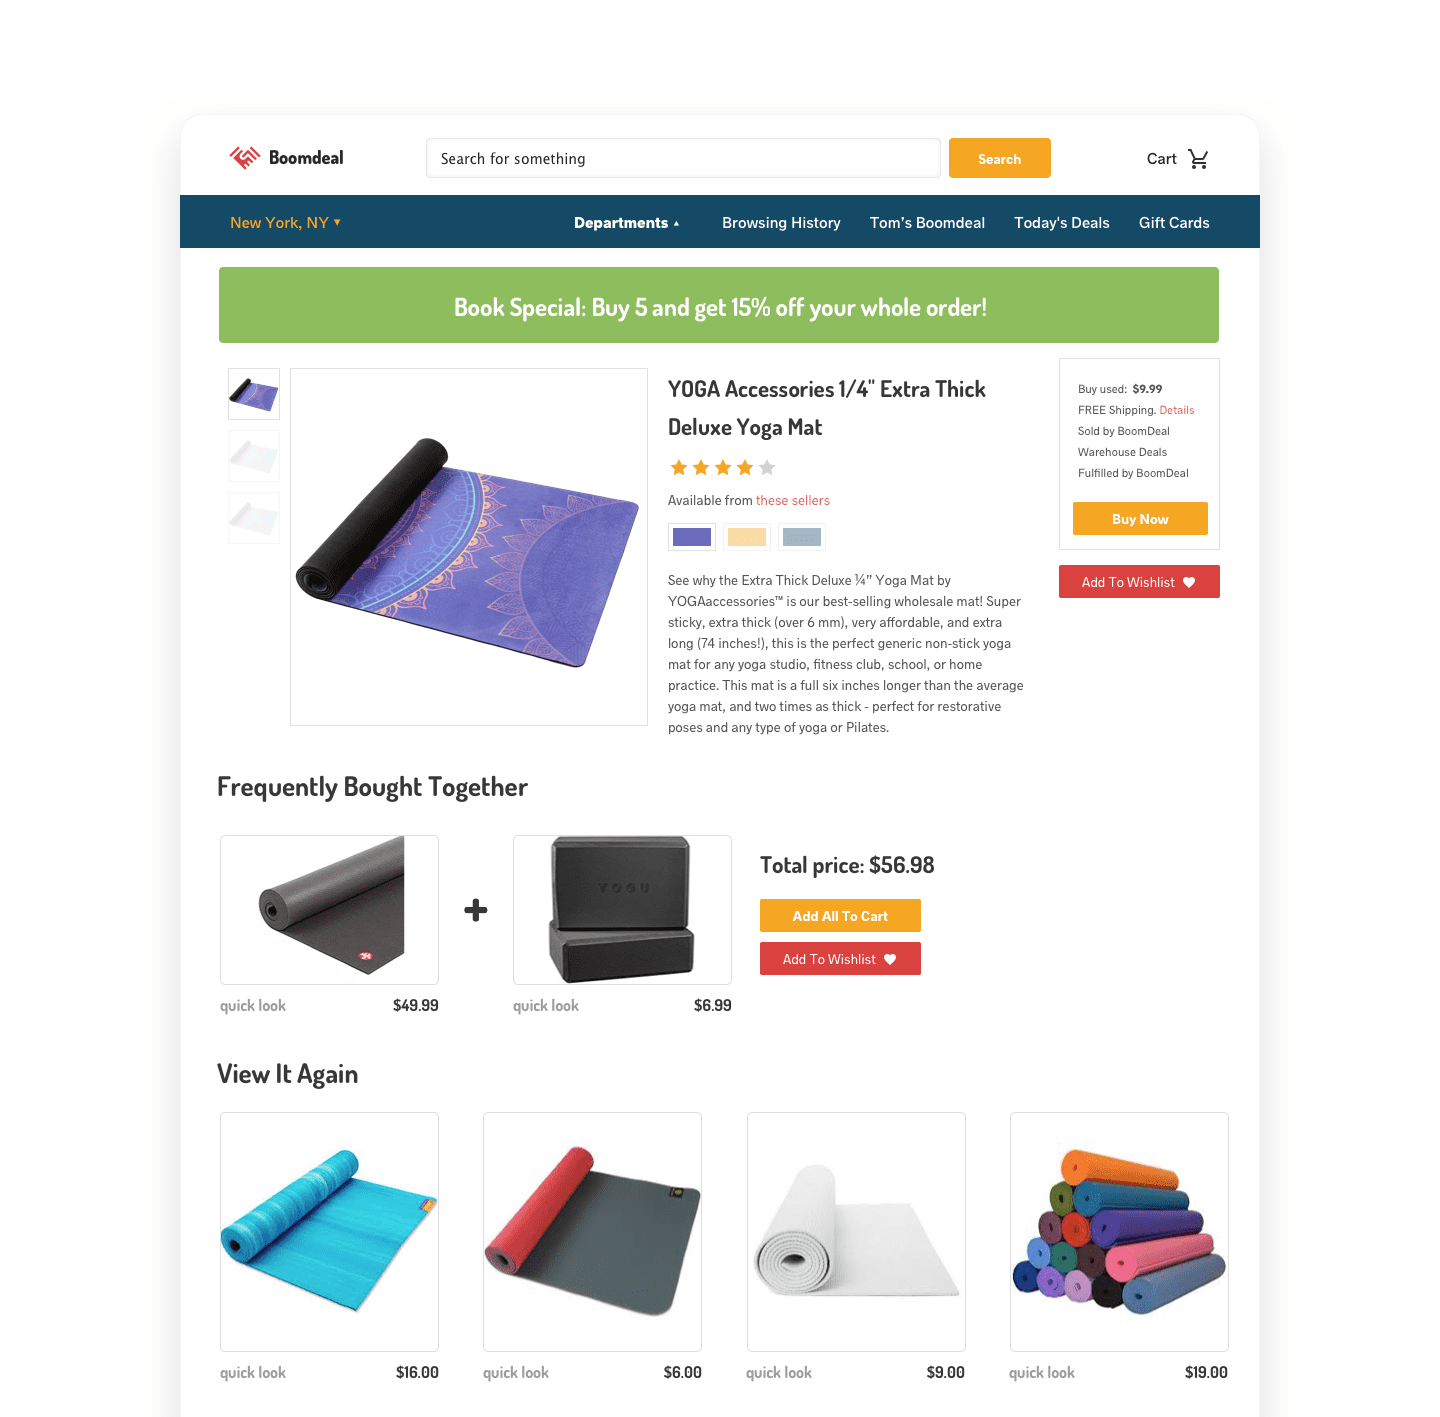

**How Market Based Analysis Works**


In order to make it easier to understand, think of Market Basket Analysis in terms of shopping at a supermarket. Market Basket Analysis takes data at transaction level, which lists all items bought by a customer in a single purchase. The technique determines relationships of what products were purchased with which other product(s). These relationships are then used to build profiles containing If-Then rules of the items purchased.

The rules are written as :

if {A} then {B} i.e. {A} => {B}

The If part of the rule (the {A} above) is known as the antecedent and the THEN part of the rule is known as the consequent (the {B} above). The antecedent is the condition and the consequent is the result.

## **Association Rules**

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

Let I={i1,i2,i3,…,in} be a set of n attributes called items and D={t1,t2,…,tn} be the set of transactions. It is called database. Every transaction, ti in D has a unique transaction ID, and it consists of a subset of itemsets in I.

Assosciation rules are produced using algorithms like :

Apriori Algorithm
Eclat Algorithm
FP-growth Algorithm
A rule can be defined as an implication, X⟶Y where X and Y are subsets of I(X,Y⊆I), and they have no element in common. X and Y are the antecedent and the consequent of the rule, respectively.

Eg: {Bread,Egg}=> {Milk} ItemSet={Bread,Egg,Milk}

There are various metrics in place to help us understand the strength of assosciation between antecedent and consequent:

- Support
- Confidence
- Lift or Correlation or interest
- Leverage
- Conviction

### **Support**


It gives an idea of how frequent an itemset is in all the transactions.To say in formal terms it's the fraction of total no. of transactions in which the itemset occurs.We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold.

supp(X−>Y)=(TransactionscontainingbothXandY)(TotalNo.oftransactions)
 
Range:[0,1] Value of support helps us identifying the rules worth for future analysis.

### **Confidence**


It defines the likelihood of occurence of consequent on the cart given that cart already has antecedent.It signifies the likelihood of item Y being purchased when item X is purchased.

confidence(X−>Y)=support(X−>Y)support(X)



### **Range:[0,1]**

If confidence is 0.75 then that imples that 75%of transactions containing X also contain Y .It can also be interpreted as the conditional probability P(Y|X), i.e, the probability of finding the itemset Y in transactions given the transaction already contains X.

It has a major drawback i.e. It only takes into account the popularity of the itemset X and not the popularity of Y. If Y is equally popular as X then there will be a higher probability that a transaction containing X will also contain Y thus increasing the confidence. To overcome this drawback there is another measure called lift.

### **Lift**


Lift gives the rise in the probability of having {Y} on the cart with the knowlede of {X} being present over the probability of having {Y} on the cart without knowlede about presence of {X}.

Lift(X−>Y)=confidence(X−>Y)support(Y)

## **Apriori Algorithm**

Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. It is devised to operate on a database containing a lot of transactions, for instance, items brought by customers in a store.Association rule learning is a prominent and a well-explored method for determining relations among variables in large databases.

Rule - generation is a two step process. First is to generate frequent item set and second is to generate rules from the considered itemset.

### **Steps Involved**


- Generate all frequent itemsets each satisfying the minimum threshold and having only one item let it be L1. Next use self join and generate all possible combinations of L1 and now let the result be L2.
- At each step as we keep on generating candidate itemsets, for each candidate we scan entire database so as to know its support and remove the candidates that do not satisfy minimum threshold
Here To reduce the no of comparisions, store the generated candidate items in a Hash Tree,Instead of matching each of candidate itemsets against each transaction,match each transaction with the candidates in hash tree(there by we can enhance the speed of apriori using this method)
- In similar way create Lk from Lk-1 until the point where we are unable to apply selfjoin.
This approach of extending a frequent itemset one at a time is called the “bottom up” approach.

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import matplotlib

!pip install squarify
import squarify

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Reading Data from CSV**

In [2]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

### **Converting into required format of TransactionEncoder**

In [3]:

trans=[]
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [4]:
t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(7501, 121)

In [5]:
data.drop('nan',axis=1,inplace=True)

In [6]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie'),
 Text(0, 0, 'turkey')]

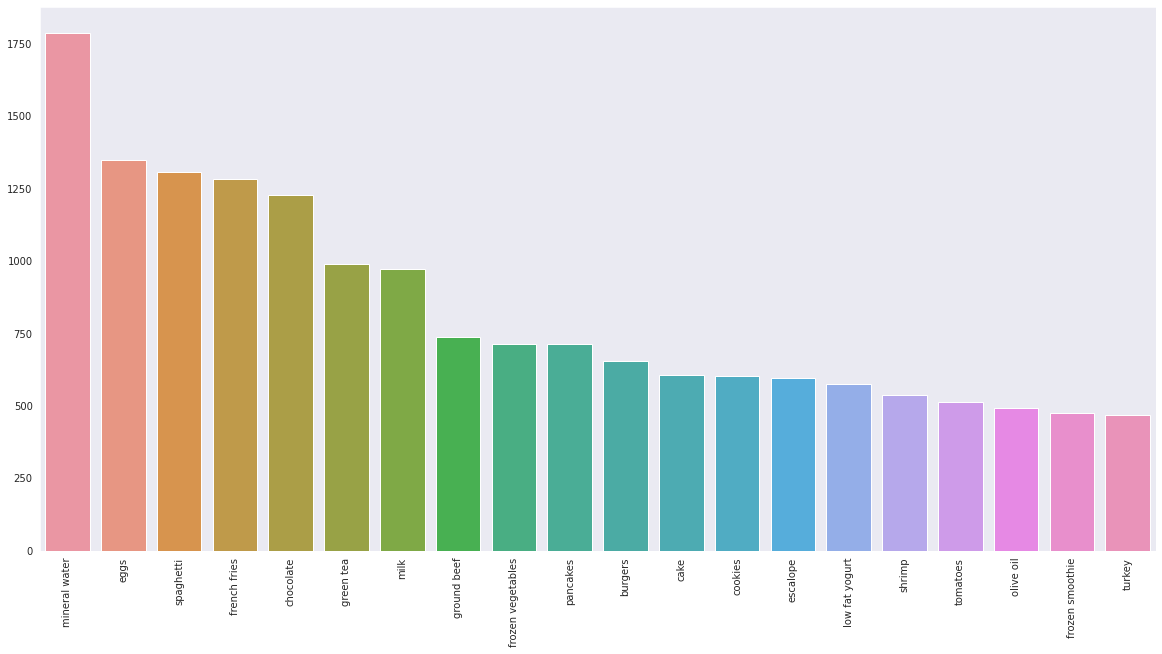

In [7]:
##consider the top 20 items purchased freequently
r=data.sum(axis=0).sort_values(ascending=False)[:20]
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

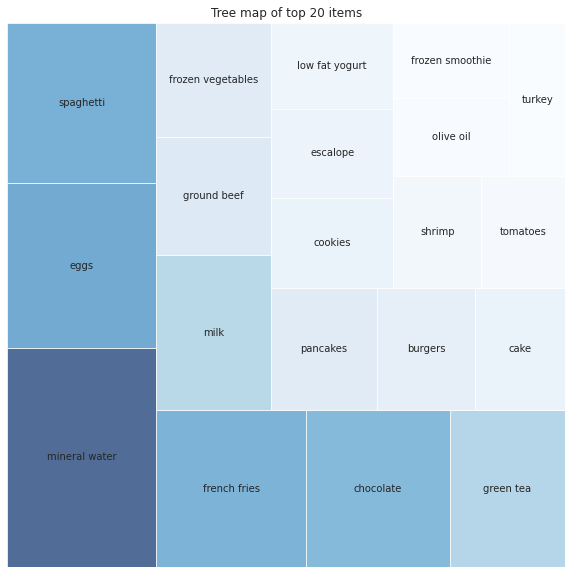

In [8]:
# create a color palette, mapped to these values
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

In [9]:
#let us return items and ietmsets with atleast 5% support:
freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [10]:
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


### **Generate the Association Rule**

In [11]:
res=association_rules(freq_items,metric="lift",min_threshold=1.3)

In [12]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [13]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [14]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(eggs, mineral water)",2
27,0.059725,"(spaghetti, mineral water)",2


In [15]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


## **FP GROWTH(Frequent Pattern Growth) ALGORITHM**

This algorithm is an improvement to the Apriori method. A frequent pattern is generated without the need for candidate generation. FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree.

This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. This fragmented part is called “pattern fragment”. The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively.



**FP TREE**


Frequent Pattern Tree is a tree-like structure that is made with the initial itemsets of the database. The purpose of the FP tree is to mine the most frequent pattern. Each node of the FP tree represents an item of the itemset.

The root node represents null while the lower nodes represent the itemsets. The association of the nodes with the lower nodes that is the itemsets with the other itemsets are maintained while forming the tree.

### **Frequent Pattern Algorithm Steps**


The frequent pattern growth method lets us find the frequent pattern without candidate generation.

Let us see the steps followed to mine the frequent pattern using frequent pattern growth algorithm:

1) The first step is to scan the database to find the occurrences of the itemsets in the database. This step is the same as the first step of Apriori. The count of 1-itemsets in the database is called support count or frequency of 1-itemset.

2) The second step is to construct the FP tree. For this, create the root of the tree. The root is represented by null.

3) The next step is to scan the database again and examine the transactions. Examine the first transaction and find out the itemset in it. The itemset with the max count is taken at the top, the next itemset with lower count and so on. It means that the branch of the tree is constructed with transaction itemsets in descending order of count.

4) The next transaction in the database is examined. The itemsets are ordered in descending order of count. If any itemset of this transaction is already present in another branch (for example in the 1st transaction), then this transaction branch would share a common prefix to the root.

This means that the common itemset is linked to the new node of another itemset in this transaction.

5) Also, the count of the itemset is incremented as it occurs in the transactions. Both the common node and new node count is increased by 1 as they are created and linked according to transactions.

6) The next step is to mine the created FP Tree. For this, the lowest node is examined first along with the links of the lowest nodes. The lowest node represents the frequency pattern length 1. From this, traverse the path in the FP Tree. This path or paths are called a conditional pattern base.

Conditional pattern base is a sub-database consisting of prefix paths in the FP tree occurring with the lowest node (suffix).

7) Construct a Conditional FP Tree, which is formed by a count of itemsets in the path. The itemsets meeting the threshold support are considered in the Conditional FP Tree.

8) Frequent Patterns are generated from the Conditional FP Tree.

### **Importing Libraries**

In [16]:
%pip install mlxtend --upgrade

In [17]:
from mlxtend.frequent_patterns import fpgrowth

In [18]:
res = fpgrowth(data,min_support=0.05,use_colnames=True)


In [19]:
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


### **Generate the Association Rule**

In [20]:
res=association_rules(res,metric="lift",min_threshold=1)

In [21]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


## **Apriori Vs FP Growth**


Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is about 5 times faster.

In [22]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(spaghetti, olive oil, mineral water)"


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(spaghetti, olive oil)"
100,0.025197,"(spaghetti, pancakes)"
101,0.021197,"(spaghetti, shrimp)"


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [23]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(cake, burgers)"
253,0.014131,"(cake, green tea)"
254,0.010265,"(cake, frozen vegetables)"
255,0.011865,"(cake, pancakes)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
98,0.040928,"(ground beef, mineral water)"
99,0.039195,"(spaghetti, ground beef)"
100,0.021997,"(ground beef, milk)"
101,0.023064,"(chocolate, ground beef)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179709,(eggs)
9,0.087188,(burgers)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

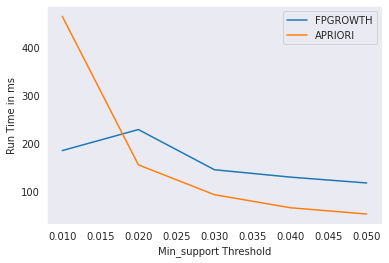

In [24]:
sns.lineplot(x=l,y=f,label="FPGROWTH")
sns.lineplot(x=l,y=t,label="APRIORI")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")